### Question 7 -
##### Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -\
● Get all the Earth meteorites that fell before the year 2000\
● Get all the earth meteorites co-ordinates who fell before the year 1970\
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

url='https://data.nasa.gov/resource/y77d-th95.json'

# To make a GET request to read the json data
requests_url=requests.get(url)

data=requests_url.json()

In [3]:
#create a Dataframe 
df=pd.DataFrame(data)

In [4]:
df.head(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN


##### 1. Get all the Earth meteorites that fell before the year 2000


In [5]:
## covert the year column to datetime format
df['year']=pd.to_datetime(df['year'].str[:4], format='%Y', errors='coerce')

In [6]:
df['year']

0     1880-01-01
1     1951-01-01
2     1952-01-01
3     1976-01-01
4     1902-01-01
         ...    
995   1934-01-01
996   2011-01-01
997   1869-01-01
998   1922-01-01
999   1905-01-01
Name: year, Length: 1000, dtype: datetime64[ns]

In [7]:
meteorites_before_2000=df[df['year'].dt.year <2000]

In [9]:
# Plot the number of meteorites by year
meteorites_counts=meteorites_before_2000['year'].dt.year.value_counts().sort_index()

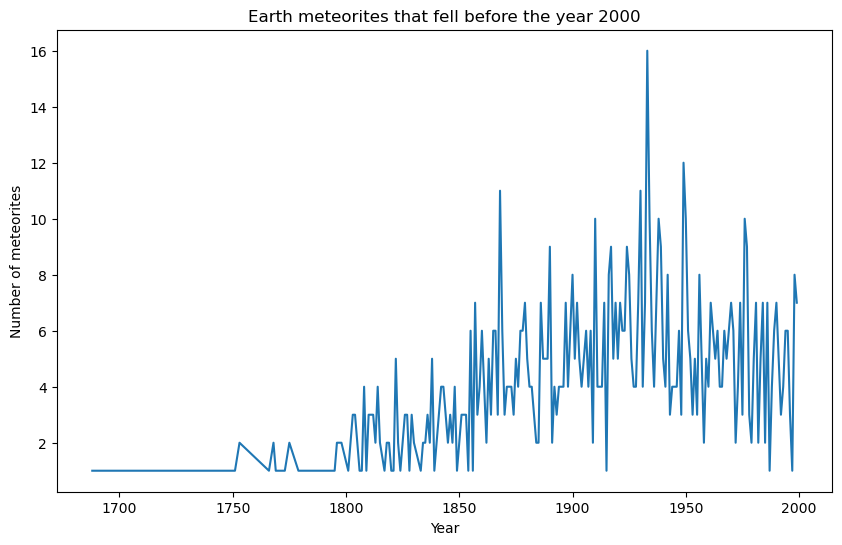

In [10]:
meteorites_counts.plot(kind='line',figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Number of meteorites')
plt.title('Earth meteorites that fell before the year 2000')
plt.show()

##### 2. Get all the earth meteorites co-ordinates who fell before the year 1970

In [12]:
#We filter the DataFrame to include only meteorites that fell before the year 1970 and have valid coordinates:
meteorites_before_1970=df[df['year'].dt.year <1970]

In [13]:
#finding null values into meteorites_before_1970
meteorites_before_1970.isna().sum()

name                             0
id                               0
nametype                         0
recclass                         0
mass                            18
fall                             0
year                             0
reclat                           6
reclong                          6
geolocation                      6
:@computed_region_cbhk_fwbd    656
:@computed_region_nnqa_25f4    655
dtype: int64

In [14]:
##histogram plot to display the distribution of meteorite fall latitudes

In [15]:
#drop NA values into ['reclat', 'reclong']
valid_coordinates=meteorites_before_1970.dropna(subset=['reclat', 'reclong'])   #reclat-latitude . reclong-longitude

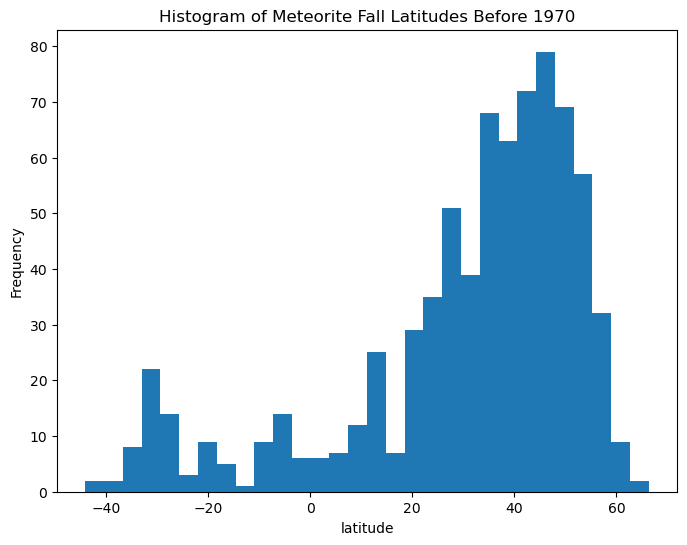

In [16]:
#histogram plot to display the distribustion of meteorite fall latitudes.
plt.figure(figsize=(8,6))
plt.hist(valid_coordinates['reclat'].astype(float),bins=30)
plt.xlabel('latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Meteorite Fall Latitudes Before 1970')
plt.show()

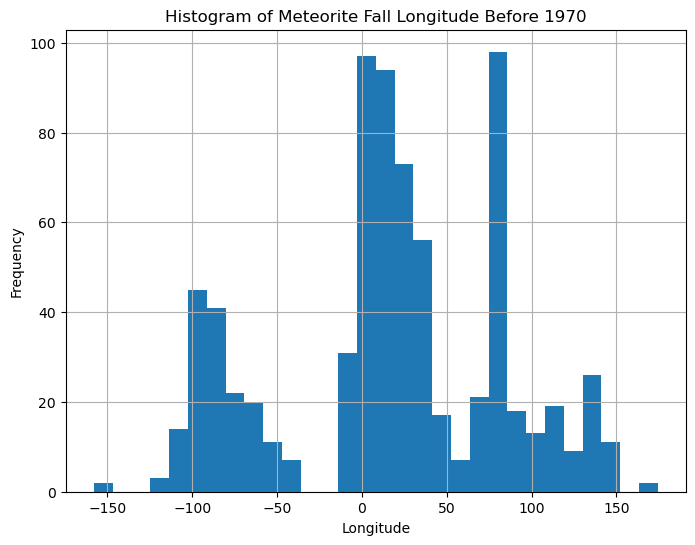

In [17]:
#histogram plot to display the distribustion of meteorite fall Longitude.
plt.figure(figsize=(8,6))
plt.hist(valid_coordinates['reclong'].astype(float),bins=30)
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Histogram of Meteorite Fall Longitude Before 1970')
plt.grid(True)
plt.show()

###### 3. Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [18]:
meteorites_greater_than_10000kg=df[df['mass'].astype(float)>10000] 

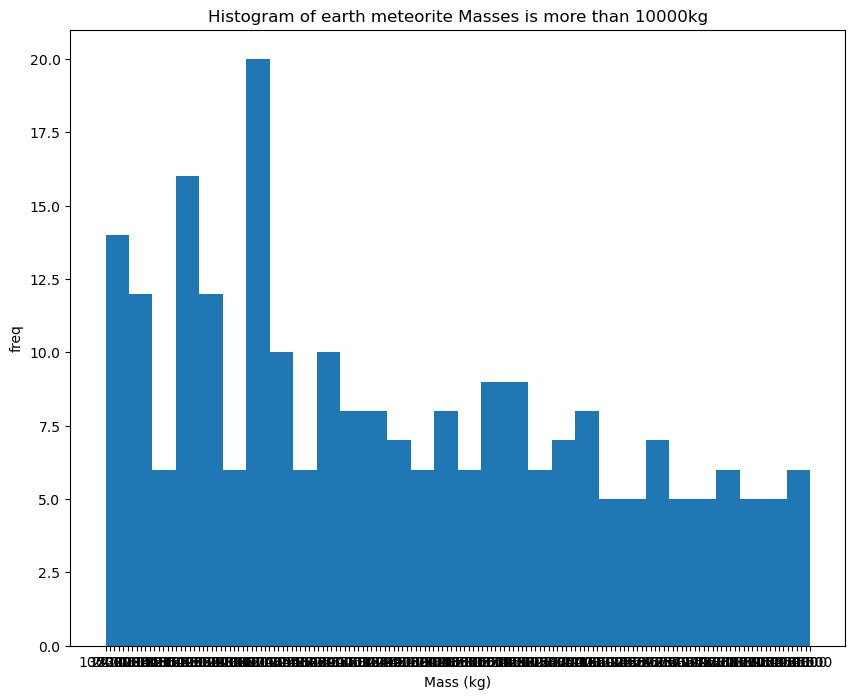

In [19]:
## plot the scatter plot of meteorite mass vs year
plt.figure(figsize=(10,8))
plt.hist(meteorites_greater_than_10000kg['mass'],bins=30)
plt.xlabel('Mass (kg)')
plt.ylabel('freq')
plt.title("Histogram of earth meteorite Masses is more than 10000kg")

plt.show()